In [1]:
import pandas as pd
import numpy as np

In [2]:
pd.set_option('display.max_columns', None)
df = pd.read_csv('main.csv')

df.head()

,Unnamed: 0,originalTitle,domestic_revenue,world_revenue,distributor,opening_revenue,opening_theaters,budget,MPAA,genres_x,release_days,tconst,titleType,isAdult,startYear,runtimeMinutes,genres_y,averageRating,numVotes,ordering,nconst,category,job,characters,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
0,0,Super 30,"$2,269,878","$24,701,637",Reliance Big Pictures,"$871,256",317,NaN,NaN,"Biography,Drama",173,tt7485048,movie,0,2019,154,"Biography,Drama",7.9,33523,9,nm0618898,producer,producer,\N,Sajid Nadiadwala,1966,\N,"producer,writer,director","tt7518786,tt2372222,tt8366590,tt7721946"
1,1,Ad Astra,"$50,188,370","$127,461,872",Twentieth Century Fox,"$19,001,398","3,460","$90,000,000",PG-13,"Adventure,Drama,Mystery,Sci-Fi,Thriller",105,tt2935510,movie,0,2019,123,"Adventure,Drama,Mystery",6.5,239699,9,nm1250070,producer,producer,\N,Jeremy Kleiner,\N,\N,"producer,miscellaneous","tt2024544,tt1020072,tt4975722,tt7125860"
2,2,The Art of Self-Defense,"$2,410,914","$2,414,269",Bleecker Street Media,"$114,374",7,NaN,R,"Action,Comedy,Crime,Drama,Mystery,Thriller",173,tt7339248,movie,0,2019,104,"Action,Comedy,Crime",6.6,38502,9,nm3442546,producer,producer,\N,Stephanie Whonsetler,\N,\N,"production_manager,miscellaneous,producer","tt6269368,tt10962368,tt7339248,tt4595186"
3,3,Welcome to Marwen,"$10,763,520","$13,061,491",Universal Pictures,"$2,354,205","1,911",NaN,PG-13,"Biography,Comedy,Drama,Fantasy,Romance",376,tt3289724,movie,0,2018,116,"Biography,Comedy,Drama",6.2,24570,9,nm0823330,producer,producer,\N,Steve Starkey,\N,\N,"producer,assistant_director,editorial_department","tt0109830,tt0118884,tt1907668,tt0162222"
4,4,Welcome to Marwen,"$10,763,520","$13,061,491",Universal Pictures,"$2,354,205","1,911",NaN,PG-13,"Biography,Comedy,Drama,Fantasy,Romance",376,tt3289724,movie,0,2018,116,"Biography,Comedy,Drama",6.2,24570,9,nm0823330,producer,producer,\N,Steve Starkey,\N,\N,"producer,assistant_director,editorial_department","tt0109830,tt0118884,tt1907668,tt0162222"


# Feature Engineering


first change the data type of certain featurs which are float by nature but acting as object

In [3]:
df['world_revenue'] = df.world_revenue.str.replace('$','',regex=True)
df['world_revenue'] = df.world_revenue.str.replace(',','',regex=True)
df['world_revenue'] = df["world_revenue"].astype(int)

In [4]:
data = df.copy()
def check_other_null(feature):
    if '\\N' in data.values :    
        if (data[feature] == '\\N').sum()>0:
            count_n = (df[feature] == '\\N').sum().sum()
            
            print(feature,count_n)

        
for feature in data.columns:
    check_other_null(feature)

runtimeMinutes 20
genres_y 1
job 329
characters 912
birthYear 579
deathYear 900
knownForTitles 4


In [5]:
df.replace('\\N', np.nan, inplace=True)

In [6]:
##finding all null values
feature_with_nan = [feature for feature in df.columns if df[feature].isnull().sum()>0]
for feature in feature_with_nan:
    print(feature,np.round(df[feature].isnull().sum()),"missing values after update")

opening_revenue 20 missing values after update
opening_theaters 25 missing values after update
budget 644 missing values after update
MPAA 79 missing values after update
runtimeMinutes 20 missing values after update
genres_y 1 missing values after update
job 329 missing values after update
characters 912 missing values after update
birthYear 579 missing values after update
deathYear 900 missing values after update
primaryProfession 6 missing values after update
knownForTitles 4 missing values after update


In [7]:
new_df = df.drop(['budget','job','birthYear','deathYear','Unnamed: 0','genres_x','primaryProfession','nconst','isAdult','domestic_revenue','opening_revenue','tconst','titleType','category'],axis = 1)

In [8]:
new_df.head()

,originalTitle,world_revenue,distributor,opening_theaters,MPAA,release_days,startYear,runtimeMinutes,genres_y,averageRating,numVotes,ordering,characters,primaryName,knownForTitles
0,Super 30,24701637,Reliance Big Pictures,317,NaN,173,2019,154,"Biography,Drama",7.9,33523,9,NaN,Sajid Nadiadwala,"tt7518786,tt2372222,tt8366590,tt7721946"
1,Ad Astra,127461872,Twentieth Century Fox,"3,460",PG-13,105,2019,123,"Adventure,Drama,Mystery",6.5,239699,9,NaN,Jeremy Kleiner,"tt2024544,tt1020072,tt4975722,tt7125860"
2,The Art of Self-Defense,2414269,Bleecker Street Media,7,R,173,2019,104,"Action,Comedy,Crime",6.6,38502,9,NaN,Stephanie Whonsetler,"tt6269368,tt10962368,tt7339248,tt4595186"
3,Welcome to Marwen,13061491,Universal Pictures,"1,911",PG-13,376,2018,116,"Biography,Comedy,Drama",6.2,24570,9,NaN,Steve Starkey,"tt0109830,tt0118884,tt1907668,tt0162222"
4,Welcome to Marwen,13061491,Universal Pictures,"1,911",PG-13,376,2018,116,"Biography,Comedy,Drama",6.2,24570,9,NaN,Steve Starkey,"tt0109830,tt0118884,tt1907668,tt0162222"


In [9]:
new_df['opening_theaters']

0        317
1      3,460
2          7
3      1,911
4      1,911
       ...  
931    3,134
932       56
933    2,378
934    2,378
935    3,038
Name: opening_theaters, Length: 936, dtype: object

In [16]:
new_df['opening_theaters'] = new_df.opening_theaters.str.replace(',','',regex=True)

In [18]:
new_df['opening_theaters'].dtypes

dtype('O')

# Problem

we have 935 different rows of continuous integer data but dtypes is object

In [10]:
#invalid parsing will be set as NaN by the parameter errors = 'coerce'
new_df['opening_theaters'] = pd.to_numeric(new_df['opening_theaters'], errors='coerce')


In [11]:
new_df['opening_theaters'].dtypes

dtype('float64')

In [12]:
new_df.isnull().sum()

originalTitle         0
world_revenue         0
distributor           0
opening_theaters    596
MPAA                 79
release_days          0
startYear             0
runtimeMinutes       20
genres_y              1
averageRating         0
numVotes              0
ordering              0
characters          912
primaryName           0
knownForTitles        4
dtype: int64

In [13]:
df['MPAA'].dtype

dtype('O')

In [14]:
df['MPAA'].value_counts()

R            399
PG-13        304
PG           145
G              7
Not Rated      2
Name: MPAA, dtype: int64

In [15]:
mode = df['MPAA'].mode()
mode

0    R
Name: MPAA, dtype: object

In [16]:
new_df['MPAA'] = new_df['MPAA'].fillna('R')

In [17]:
new_df['MPAA'].isnull().sum()

0

In [18]:
new_df['opening_theaters'].isnull().sum()

596

In [19]:
new_df['opening_theaters'].unique()

array([317.,  nan,   7.,   4., 320., 381., 311., 301.,   1., 997., 101.,
       263.,   6.,   3.,   5.,  89., 270., 305.,   2.,  19., 873., 922.,
       258., 853., 613., 120.,   8.,  17.,  33., 461.,  25., 198., 673.,
       629., 830.,  14., 544., 503., 755.,   9., 650., 300.,  45.,  75.,
       112., 475.,  66.,  32.,  74., 450., 471., 408.,  30., 388., 283.,
       259.,  23., 900.,  24., 401., 865., 413.,  58., 191., 114., 250.,
       421., 208., 319., 330., 227., 816.,  51., 343., 308., 201., 239.,
       186., 216., 202.,  20., 123., 130., 519., 122., 534.,  70.,  13.,
       543., 477.,  68., 248., 501.,  90., 298., 249., 440., 814., 172.,
       356., 326., 104.,  34.,  16.,  29.,  36., 786., 222., 369., 195.,
        59., 442., 529., 527.,  44., 102., 704.,  57., 100., 169.,  81.,
       327., 912., 265., 460.,  85., 871., 129., 970., 387., 247.,  69.,
       389.,  10.,  48.,  12., 547., 562., 665., 500., 752., 400., 246.,
       580., 491., 552., 640., 927., 132., 996.,  2

In [20]:
remove_duplicate  =set(new_df['opening_theaters'])
count = len(remove_duplicate)
print(count)

790


In [21]:
new_df['opening_theaters'].mode()

0    4.0
Name: opening_theaters, dtype: float64

Text(0.5, 1.0, 'opening_theaters null--->1 not null--->0')

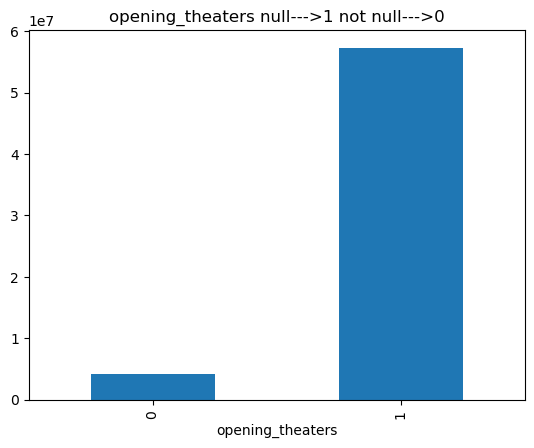

In [23]:
data = new_df.copy()
import matplotlib.pyplot as plt
data['opening_theaters'] = np.where(data['opening_theaters'].isnull(),1,0)
#groupy function group the data and by computing the median we plot bar graph of 2 feature
data.groupby('opening_theaters')['world_revenue'].median().plot.bar()
plt.title('opening_theaters null--->1 not null--->0')

In [26]:
new_df['runtimeMinutes'].dtype

dtype('O')

In [24]:
new_df['runtimeMinutes'].unique()

array(['154', '123', '104', '116', '98', '118', '166', '134', '170', '94',
       '150', '158', '105', '95', '112', '138', '130', '107', '97', '55',
       '89', '85', '99', '91', '111', nan, '82', '121', '114', '103',
       '96', '100', '102', '109', '84', '101', '149', '124', '76', '106',
       '144', '90', '133', '92', '54', '93', '126', '47', '136', '119',
       '120', '131', '110', '87', '108', '135', '132', '148', '152',
       '125', '72', '117', '128', '122', '86', '129', '143', '137', '161',
       '169', '141', '139', '155', '80', '181', '113', '115', '75', '45',
       '78', '81', '88', '145', '53', '140', '164', '60', '69', '174',
       '179', '127', '83', '151', '156', '163', '147', '65', '70', '160',
       '175', '168', '159', '74', '195', '167', '189', '61', '142', '192',
       '176', '165', '52'], dtype=object)

In [28]:
new_df['runtimeMinutes'].isnull().sum()

20

In [31]:
#invalid parsing will be set as NaN by the parameter errors = 'coerce'
new_df['runtimeMinutes'] = pd.to_numeric(new_df['runtimeMinutes'], errors='coerce')

In [34]:
np.median(new_df['runtimeMinutes'])

nan

In [41]:
def normal_pdf(x):
    return 1 / (np.std(x) * np.sqrt(2 * np.pi)) * np.exp(-0.5 * ((x - np.mean(x)) / np.std(x))**2)

In [48]:
feature_with_num = [feature for feature in new_df.columns if new_df[feature].dtypes!='O' and feature'opening_theaters']
for feature in feature_with_num:
    mean_ = np.mean(df[feature])
    std_ = np.std(df[feature])

    # Create histogram of the data
    plt.hist(df[feature], bins=30, density=True, alpha=0.6, color='blue')

    # Create normal distribution curve with same mean and standard deviation as data for empirical rule or the 68-95-99.7 rule
    x = np.linspace(mean_ - 3*std_, mean_ + 3*std_, 100)
    plt.plot(x, normal_pdf(x), color='red')

    # Set plot labels and title
    plt.xlabel(feature)
    plt.ylabel('Probability Density')
    plt.title('Histogram and Normal Distribution Curve of Data')

    # Show plot
    plt.show()

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [44]:
new_df[feature_with_num].head()

,world_revenue,opening_theaters,release_days,startYear,runtimeMinutes,averageRating,numVotes,ordering
0,24701637,317.0,173,2019,154.0,7.9,33523,9
1,127461872,NaN,105,2019,123.0,6.5,239699,9
2,2414269,7.0,173,2019,104.0,6.6,38502,9
3,13061491,NaN,376,2018,116.0,6.2,24570,9
4,13061491,NaN,376,2018,116.0,6.2,24570,9


In [1]:
import os
os.chdir('../')

In [2]:
os.listdir()

['config',
 'newFolderStructure .jpg',
 'movies_logs',
 'setup.py',
 'Movies',
 'test_run.py',
 'venv',
 'movie_grossincome_prediction.egg-info',
 'artifact',
 'README.md',
 'dist',
 'processflow.jpg',
 'ProgramFlow.jpg',
 'LICENCE',
 'app.py',
 'research',
 'case_study.py',
 'Dockerfile',
 'build',
 '.gitignore',
 '.git',
 'tests',
 'stratified_sampling.jpg',
 'requirements.txt']

In [6]:
from Movies.component.data_validation import DataValidation

In [7]:
DataValidation.initiate_data_validation()

TypeError: initiate_data_validation() missing 1 required positional argument: 'self'

In [3]:
from Movies.utils.read_yaml import read_yaml_file

In [4]:
from Movies.entity.artifact_entity import DataValidationArtifact
schema_file_path = DataValidationArtifact.schema_file_path

In [5]:
schema_file_path

_tuplegetter(0, 'Alias for field number 0')